In [1]:
# Coursera IBM Course - Data Visualization with Python

# Lab 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Read xlsx file - install xlrd module first

# Dataset from: https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp# 
df_can = pd.read_excel("Canada.xlsx",
                    sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skipfooter=2)
# skipfooter = rows at the end to skip (here: the last two rows are totals for each each year)

In [4]:
# Remove unnecessary columns
# drop()

df_can.drop(['AREA','REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [5]:
# Rename columns
# rename()

df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns.values

array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

In [6]:
# examine the types of the column labels

all(isinstance(column, str) for column in df_can.columns)

# all - Return whether all elements are True
# isinstance(object, classinfo) - checks if the object (first argument) is an instance or subclass of classinfo class (second argument)

False

In [7]:
# As isinstance is False - change all columns to string type

df_can.columns = list(map(str, df_can.columns))
all(isinstance(column, str) for column in df_can.columns)

True

In [8]:
# Adding a "Total" column that sums up the total immigrants by country

df_can["Total"]=df_can.sum(axis=1)

In [9]:
# Set "Country" as index 
# set_index()

df_can.set_index("Country", inplace=True)

In [10]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
df_can.shape

(195, 38)

In [13]:
years = list(map(str, range(1980,2014)))

# Visualizing Data

In [14]:
# Area Plots (Stacked line plots)

In [15]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot'])

In [16]:
# Sort values in descending order
df_can.sort_values(["Total"], ascending=False, axis=0, inplace=True)

# Select 5 countriesthat contribued the most immigrants to Canada from 1980 to 2013

top5 = df_can.head()

top5 = top5[years].transpose()

top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [17]:
# Area plots are stacked by default. And to produce a stacked area plot, 
# each column must be either all positive or all negative values 
# (any NaN values will defaulted to 0). To produce an unstacked plot, 
# pass stacked=False

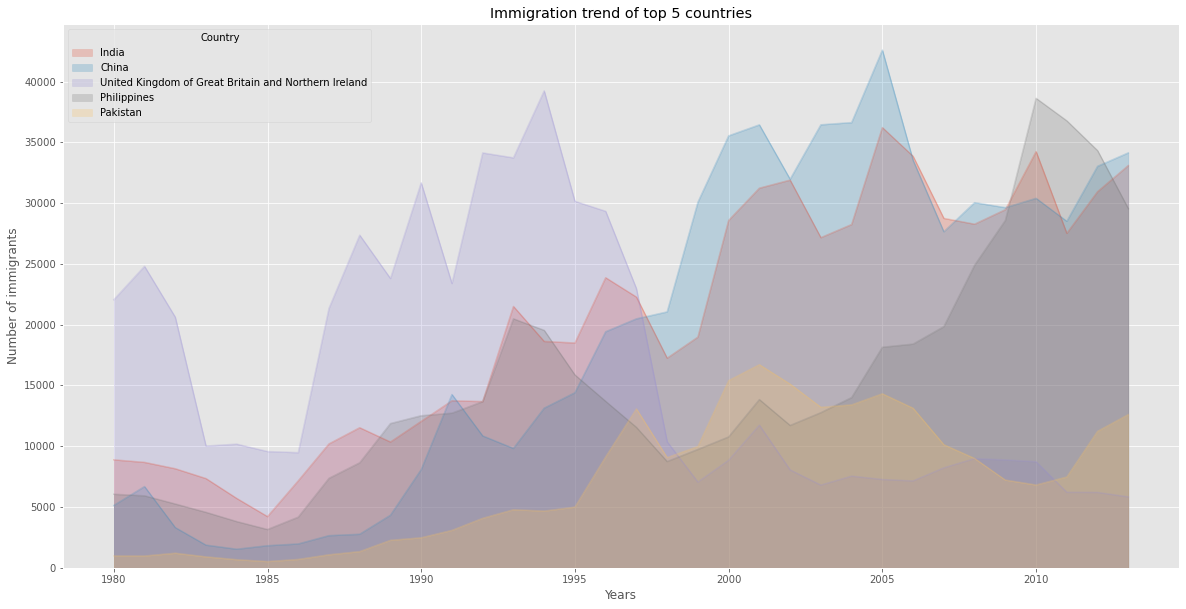

In [26]:
# Plotting using a scripting layer (procedural method) - using matplotlib.pyplot as 'plt'

# top5.index = top5.index.map(int)

top5.plot(kind='area',
          alpha=0.25,
            stacked=False,
            figsize=(20,10))

plt.title("Immigration trend of top 5 countries")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")

plt.show()

Text(0, 0.5, 'Number of immigrants')

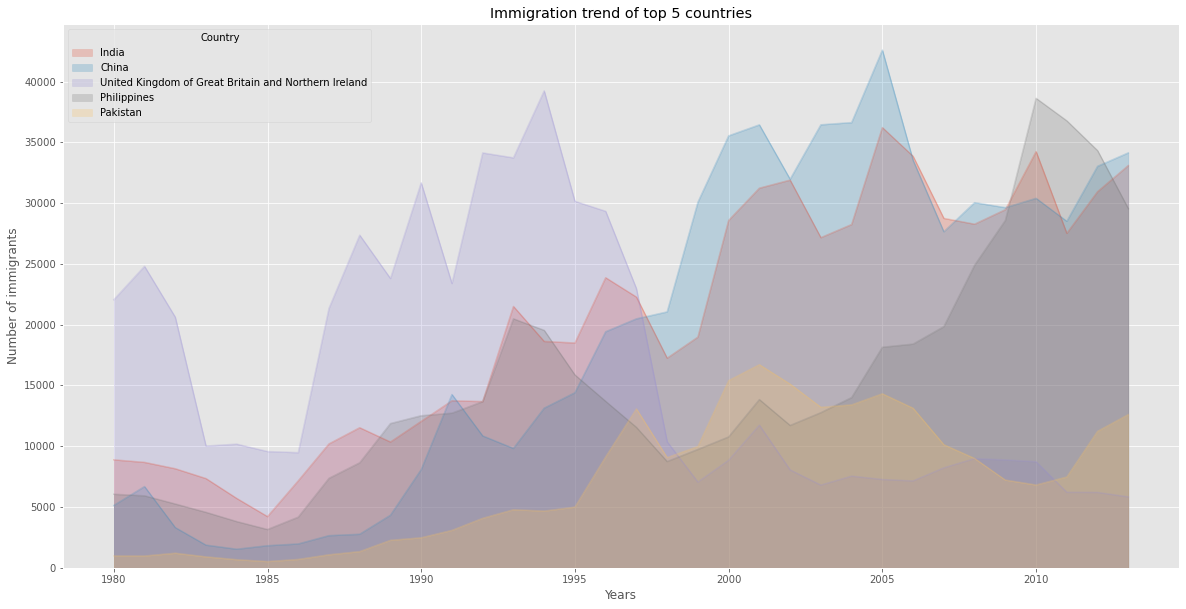

In [27]:
# Plotting using an artist layer (Object orientated method) - using an Axes instance from Matplotlib (preferred)

ax = top5.plot(kind='area', alpha=0.25, stacked=False, figsize=(20,10))

ax.set_title("Immigration trend of top 5 countries")
ax.set_xlabel("Years")
ax.set_ylabel("Number of immigrants")

In [28]:
# 5 countries that contributed the least to immigration to Canada from 1980 to 2013

df_can.sort_values(["Total"], axis=0, inplace=True)

least5 = df_can.head(5)
least5 = least5[years].transpose()

least5.head()

Country,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino
1980,0,0,0,0,1
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


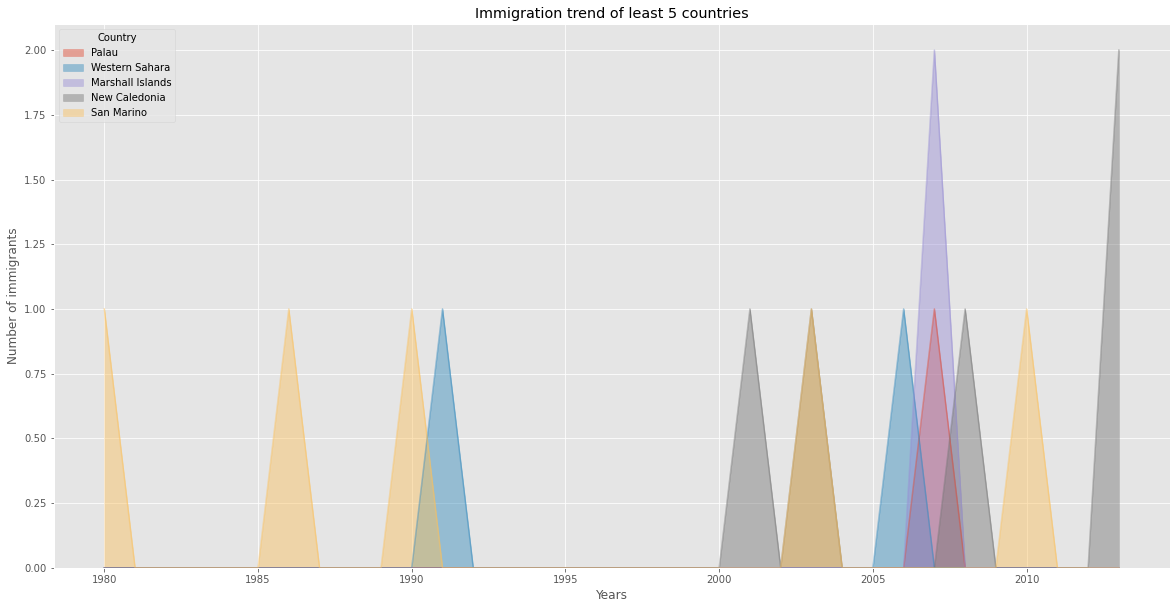

In [29]:
least5.plot(kind="area", alpha=0.45, stacked=False, figsize=(20,10))

plt.title("Immigration trend of least 5 countries")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")

plt.show()

Text(0, 0.5, 'Number of immigrants')

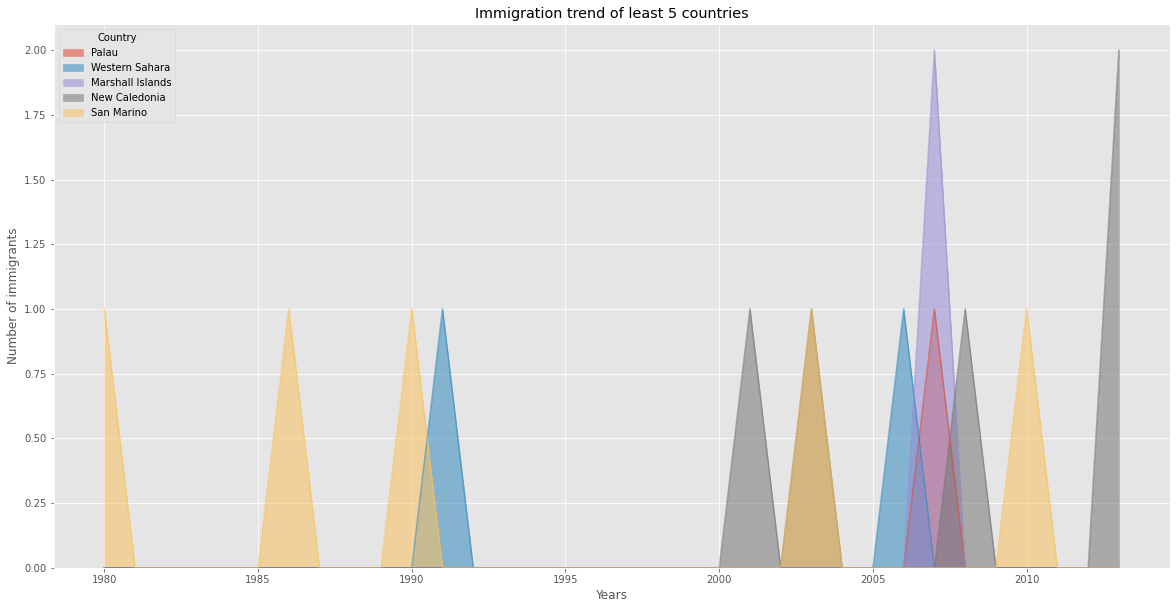

In [31]:
ax = least5.plot(kind="area", alpha=0.55, stacked=False, figsize=(20,10))

ax.set_title("Immigration trend of least 5 countries")
ax.set_xlabel("Years")
ax.set_ylabel("Number of immigrants")


In [32]:
# Histograms

# frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [33]:
df_can["2013"].head()

Country
Palau               0
Western Sahara      0
Marshall Islands    0
New Caledonia       2
San Marino          0
Name: 2013, dtype: int64

In [35]:
# np.histogram

count, bin_edges = np.histogram(df_can["2013"])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


In [36]:
# 178 countries contributed between 0 to 3412.9 immigrants
# 11 countries contributed between 3412.9 to 6825.8 immigrants
# 1 country contributed between 6285.8 to 10238.7 immigrants

In [51]:
df_can["2013"].head()

Country
Palau               0
Western Sahara      0
Marshall Islands    0
New Caledonia       2
San Marino          0
Name: 2013, dtype: int64

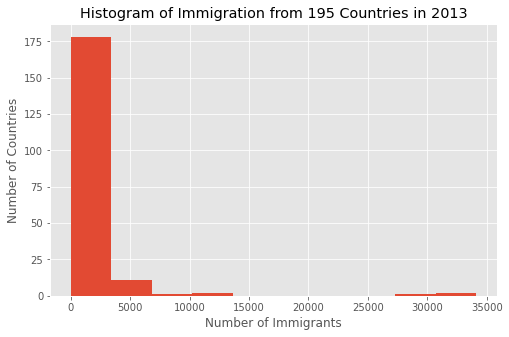

In [38]:
df_can["2013"].plot(kind="hist", figsize=(8,5))

plt.title('Histogram of Immigration from 195 Countries in 2013') 
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants') 

plt.show()

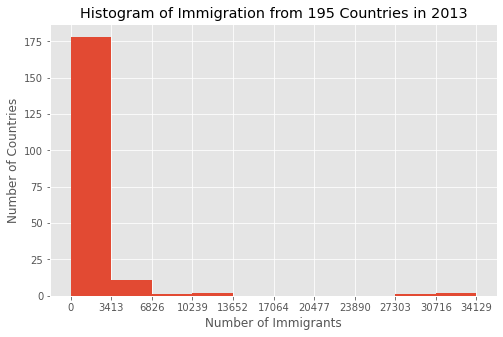

In [39]:
# Notice that the x-axis labels do not match with the bin size. 
# This can be fixed by passing in a xticks keyword that contains the 
# list of the bin sizes

df_can["2013"].plot(kind="hist", figsize=(8,5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013') 
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants') 

plt.show()

In [41]:
# What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [42]:
df_can.loc[["Denmark","Norway", "Sweden"], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


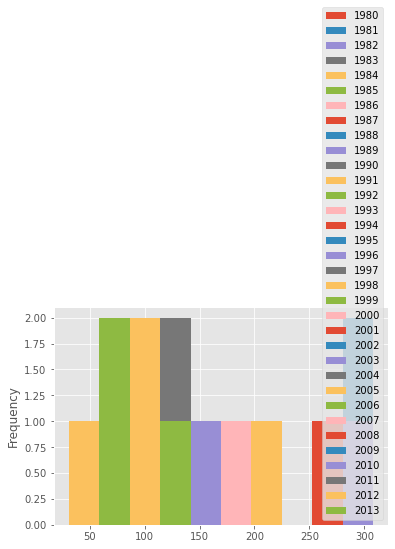

In [43]:
df_can.loc[["Denmark","Norway", "Sweden"], years].plot.hist()

In [46]:
df_trans = df_can.loc[["Denmark","Norway", "Sweden"], years].transpose()
df_trans.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


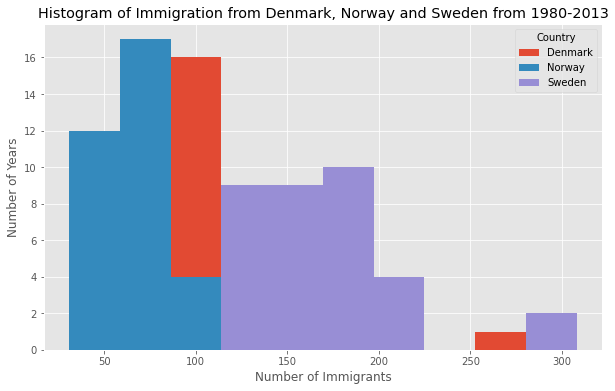

In [49]:
df_trans.plot(kind="hist", figsize=(10,6))
plt.title("Histogram of Immigration from Denmark, Norway and Sweden from 1980-2013")
plt.xlabel("Number of Immigrants")
plt.ylabel("Number of Years")

plt.show()

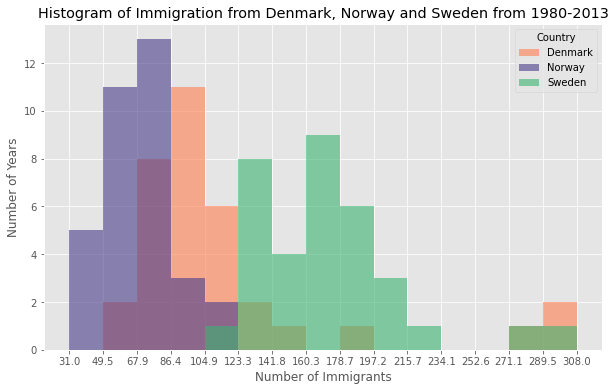

In [55]:
count, bin_edges = np.histogram(df_trans, 15)

# un-stacked histogram
df_trans.plot(kind="hist",
         figsize=(10,6),
         bins = 15,
         alpha=0.6,
         xticks=bin_edges,
         color=["coral", "darkslateblue", "mediumseagreen"])
plt.title("Histogram of Immigration from Denmark, Norway and Sweden from 1980-2013")
plt.xlabel("Number of Immigrants")
plt.ylabel("Number of Years")

plt.show()

In [56]:
# Full list of colors available in Matplotlib:

import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


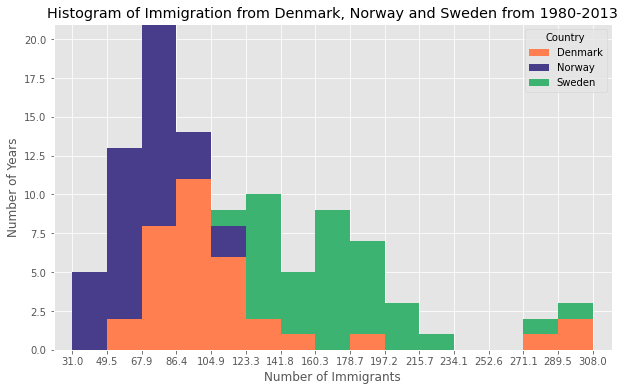

In [57]:
count, bin_edges = np.histogram(df_trans, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked histogram
df_trans.plot(kind="hist",
         figsize=(10,6),
         bins = 15,
         xticks=bin_edges,
         color=["coral", "darkslateblue", "mediumseagreen"],
            stacked=True,
            xlim=(xmin,xmax)
             )
plt.title("Histogram of Immigration from Denmark, Norway and Sweden from 1980-2013")
plt.xlabel("Number of Immigrants")
plt.ylabel("Number of Years")

plt.show()

In [58]:
# immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013

df_can.loc[["Greece","Albania", "Bulgaria"], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Greece,1065,953,897,633,580,584,547,765,564,773,...,120,100,74,110,107,119,101,102,146,298
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Bulgaria,24,20,12,33,11,24,33,52,43,85,...,2022,1738,1419,1172,994,784,556,365,451,512


In [60]:
df_trans2 = df_can.loc[["Greece","Albania", "Bulgaria"], years].transpose()
df_trans2.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


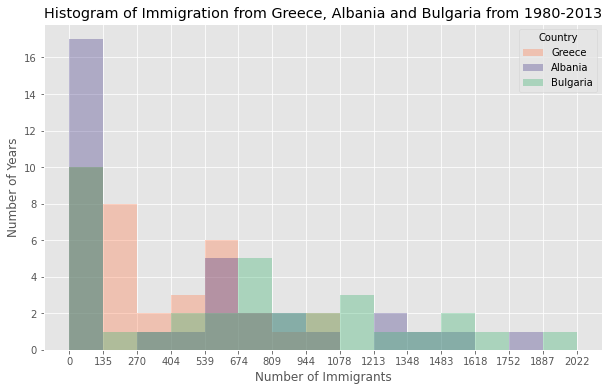

In [62]:
count, bin_edges = np.histogram(df_trans2, 15)

# un-stacked histogram
df_trans2.plot(kind="hist",
         figsize=(10,6),
         bins = 15,
         alpha=0.35,
         xticks=bin_edges,
         color=["coral", "darkslateblue", "mediumseagreen"])
plt.title("Histogram of Immigration from Greece, Albania and Bulgaria from 1980-2013")
plt.xlabel("Number of Immigrants")
plt.ylabel("Number of Years")

plt.show()

In [63]:
# Bar Charts (Dataframe)

# kind = "bar" / "barh"

# In vertical bar graphs, the x-axis is used for labelling, and the 
# length of bars on the y-axis corresponds to the magnitude of the 
# variable being measured. Vertical bar graphs are particuarly useful 
# in analyzing time series data. One disadvantage is that they lack 
# space for text labelling at the foot of each bar.

In [64]:
# The 2008 - 2011 Icelandic Financial Crisis was a major economic and 
# political event in Iceland. Relative to the size of its economy, 
# Iceland's systemic banking collapse was the largest experienced by 
# any country in economic history. The crisis led to a severe economic 
# depression in 2008 - 2011 and significant political unrest.

# Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013. 

In [65]:
Iceland = df_can.loc["Iceland", years]
Iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

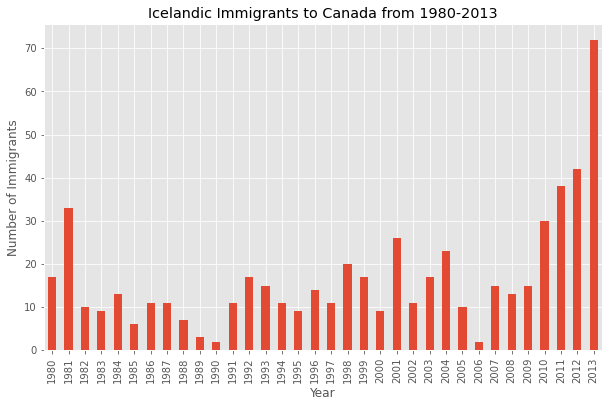

In [66]:
Iceland.plot(kind="bar", figsize=(10,6))

plt.title("Icelandic Immigrants to Canada from 1980-2013")
plt.ylabel("Number of Immigrants")
plt.xlabel("Year")

plt.show()

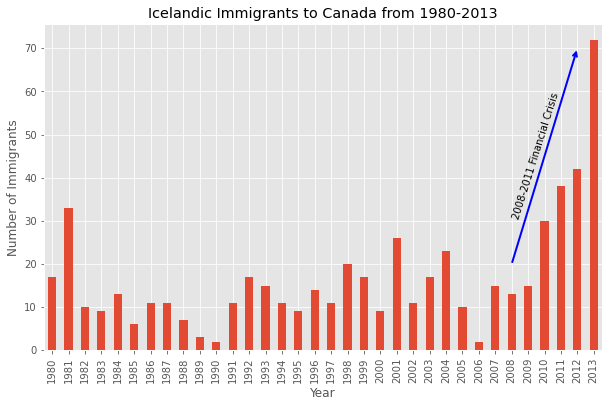

In [67]:
Iceland.plot(kind="bar", figsize=(10,6), rot=90)

plt.title("Icelandic Immigrants to Canada from 1980-2013")
plt.ylabel("Number of Immigrants")
plt.xlabel("Year")

# Annotate arrow
plt.annotate("",             # s: str. will leave it blank for no text
            xy=(32,70),      # place head of the arrow at point (year 2012 , pop 70)
            xytext=(28,20),  # place base of the arrow at point (year 2008 , pop 20)
            xycoords="data", # will use the coordinate system of the object being annotated 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2)
            )
# Annotate text

plt.annotate("2008-2011 Financial Crisis",   # text to display
            xy=(28,30),                      # start the text at point (year 2008 , pop 30)
            rotation=72.5,                   # based on trial and error to match the arrow
            va="bottom",                     # want the text to be vertically 'bottom' aligned
            ha="left",)                      # want the text to be horizontally 'left' algned.

plt.show()

In [78]:
df_can.sort_values(by="Total", ascending=False, axis=0, inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [114]:
top15 = df_can["Total"].head(15)
top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

In [115]:
# top15 = top15["Total"]

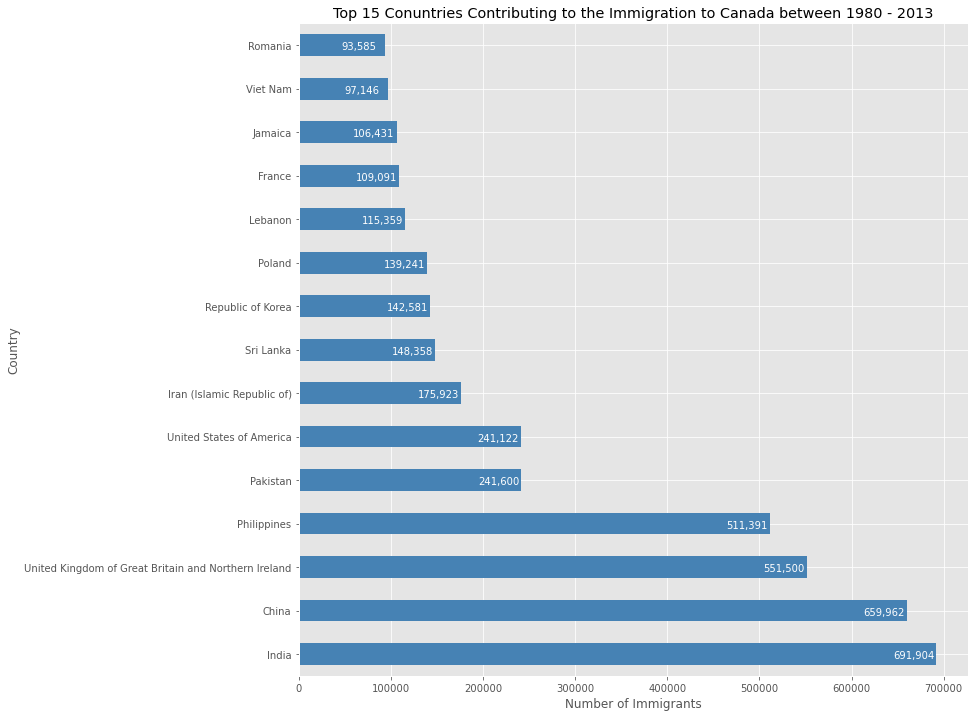

In [120]:
top15.plot(kind="barh", figsize=(12,12), color="steelblue")

plt.title("Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013")
plt.xlabel("Number of Immigrants")
plt.ylabel("Country")

#top15.index = top15.index.map(int)
# annotate value labels to each country
for index, value in enumerate(top15): 
    label = format(int(value), ',')# format int with commas
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()
